In [ ]:
pip install "numpy<1.24.0"

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import numpy as np
import pandas as pd

# importing text preprocessing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
# integrating our preprocessing into a pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

In [9]:
#import dataset
original_data = pd.read_csv('cleanedreview.csv')


In [12]:
data=original_data[['Pros','Cons','Rating']].dropna()

In [13]:
data.shape

(11203, 3)

In [14]:
#reduce rating classes to two - 1-3 or 4-5
data['GroupedRatings']=data['Rating'].apply(lambda x: "1-3" if x < 4 else "4-5" )

In [15]:
#change the class names for easier interpretation
data['RatingClass']=data['GroupedRatings'].apply(lambda x: 0 if x == "1-3" else 1 )

In [16]:
X = data[['Pros','Cons']]
y = data['RatingClass']

In [17]:
data.shape

(11203, 5)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
preprocess = ColumnTransformer(
    [('pro_tfidf', TfidfVectorizer(), 'Pros'),
    ('con_tfidf', TfidfVectorizer(), 'Cons')], remainder = 'drop' )

## Baseline Modeling

In [26]:
#import modeling libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

from sklearn.model_selection import KFold


/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
# Create a list of selected modeling algorithsm
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

kfold = model_selection.KFold(n_splits=10, random_state=7)


/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
X_train

In [28]:
acc_results = []
auc_results = []
names = []
#create a table for different scores
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

df_results = pd.DataFrame(columns=col)

i = 0

# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,NaN,NaN,NaN,NaN
1,Random Forest,NaN,NaN,NaN,NaN
2,SVM,NaN,NaN,NaN,NaN
3,KNN,NaN,NaN,NaN,NaN
4,Decision Tree Classifier,NaN,NaN,NaN,NaN
5,Gaussian NB,NaN,NaN,NaN,NaN


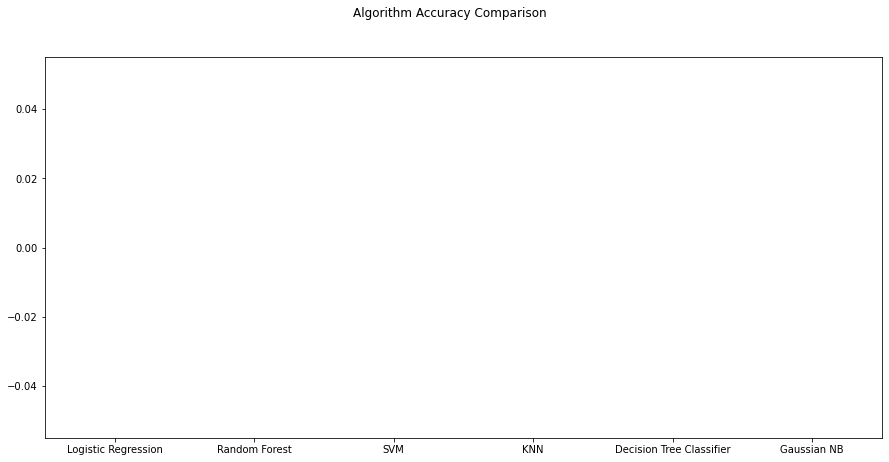

In [29]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

## Model Tuning - Logistic Regression


In [ ]:
%time
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV


lr_pipe = Pipeline([('preprocess', preprocess),
                ('smote', SMOTE(sampling_strategy=0.75,random_state=42)),
                ('lr',LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=42))])


# Fit the model to the training data

param_grid = [{'lr__C': np.arange(1e-03, 2, 0.01)}] # hyper-parameter list to fine-tune
log_gs = GridSearchCV(estimator = lr_pipe,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_gs.fit(X_train, y_train)
log_opt = log_gs.best_estimator_
results = log_gs.cv_results_
y_pred = log_gs.predict(X_test)


print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)
print(classification_report(y_test,y_pred))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/Users/Shen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/Shen/opt/

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(log_gs, X_test, y_test, ax=ax, cmap="cividis");

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred,)}')
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1 Score: {f1_score(y_test,y_pred)}')

## Model Tuning - Random Forrest

In [ ]:
%time
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

rf_pipe = Pipeline([('preprocess', preprocess),
                ('smote', SMOTE(sampling_strategy=0.75,random_state=42)),
                ('rf',RandomForestClassifier(random_state=42))])


param_grid = {'rf__n_estimators':[50,70,80,100],
        'rf__criterion':['gini','entropy'],
        'rf__min_samples_leaf':[10,20,30],
        'rf__max_depth':[5,10,15,20,25],
        'rf__min_samples_split':[5,8,10,15]}  

 # hyper-parameter list to fine-tune
rf_gs = GridSearchCV(rf_pipe,# setting GridSearchCV                 
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

rf_gs.fit(X_train, y_train)
rf_opt = rf_gs.best_estimator_
results = rf_gs.cv_results_
y_pred = rf_gs.predict(X_test)


print('='*20)
print("best params: " + str(rf_pipe.best_estimator_))
print("best params: " + str(rf_pipe.best_params_))
print('best score:', rf_pipe.best_score_)
print('='*20)
print(classification_report(y_test,y_pred))

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred,)}')
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1 Score: {f1_score(y_test,y_pred)}')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(rf_gs, X_test_transformed, y_test, ax=ax, cmap="cividis");